# Non-linear regression

Importing needed modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Load data

In [2]:
df = pd.read_excel('Desktop/canada_gdp.xlsx')
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
year     59 non-null int64
value    59 non-null object
GDP      58 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB
None


,year,value,GDP
0,2018,"1,712,479M.$",0.020
1,2017,"1,649,934M.$",0.032
2,2016,"1,530,024M.$",0.010
3,2015,"1,556,506M.$",0.007
4,2014,"1,805,745M.$",0.029


In [3]:
# Removing the Milion$ and converting the values into integer
value=[]
for i in (df['value']):
    i=i.strip('M.$')
    i=i.replace(',','')
    value.append(int(i))
    #df['value']=append.int(i)

Ploting the GDP data to get an idea of choosing a model to fit on the curve 

In [4]:
plt.plot(df['year'],d)
plt.xlabel('year',fontsize=16)
plt.ylabel('gdp_value',fontsize=16)
plt.xticks(fontsize=16,rotation=90)
plt.yticks(fontsize=12)
plt.grid(c='k',linestyle='-.')

NameError: name 'd' is not defined


The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building The Model ###
Now, let's build our regression model and initialize its parameters. 

In [5]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Lets normalize our data


In [6]:
xdata =df['year']/max(df['year'])
valuemax =max(value)
ydata= [value / valuemax for value in value]
ydata=np.asanyarray(ydata)

In [7]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 231.690843, beta_2 = 0.990747


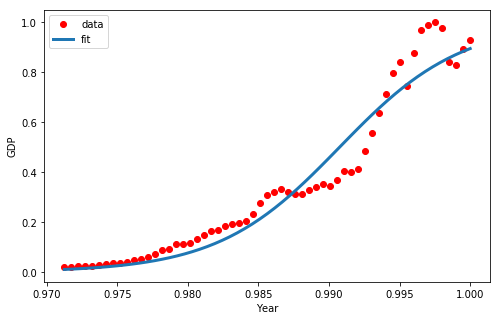

In [8]:
x = np.linspace(1960, 2018, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [9]:
   
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.08
Residual sum of squares (MSE): 0.01
R2-score: 0.88
